In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path
path=r'C:\Users\jerem\anaconda\Instacart\Data'

In [3]:
# Import data
norm_act=pd.read_pickle(r'C:\Users\jerem\anaconda\Instacart\Data\normal_activity.pkl')

In [4]:
# Create profile based on age
norm_act['Age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [4]:
norm_act.loc[(norm_act['Age'] >= 18) & (norm_act['Age'] <35), 'age_group']= 'Younger'

In [5]:
norm_act.loc[(norm_act['Age'] >= 35) & (norm_act['Age'] <60), 'age_group']= 'Middle'

In [6]:
norm_act.loc[norm_act['Age'] >= 60, 'age_group']= 'Older'

In [8]:
norm_act['age_group'].describe()

count     30964564
unique           3
top         Middle
freq      12147765
Name: age_group, dtype: object

In [9]:
# Create profile based on income
norm_act['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [10]:
norm_act.loc[(norm_act['income'] <67292), 'income_group']= 'Lower income'

In [15]:
norm_act.loc[(norm_act['income'] >= 67292) & (norm_act['income'] < 96765), 'income_group']= 'Mid income'

In [16]:
norm_act.loc[(norm_act['income'] >= 96765) & (norm_act['income'] < 128102), 'income_group']= 'Upper income'

In [17]:
norm_act.loc[(norm_act['income'] >= 128102), 'income_group']= 'High income'

In [18]:
norm_act['income_group'].describe()

count         30964564
unique               4
top       Upper income
freq           7742166
Name: income_group, dtype: object

In [7]:
# Create profile based on department id
df_dep=pd.read_csv(r'C:\Users\jerem\anaconda\Instacart\Data\departments.csv', index_col = False)

In [25]:
df_dep.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [8]:
df_dep.rename(columns= {'Unnamed: 0' : 'department_id'}, inplace= True)

In [9]:
norm_act_d=norm_act.merge(df_dep, on = ['department_id'])

In [30]:
# Create customer profile based on dependants
norm_act_d['n_dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

In [31]:
norm_act_d.loc[(norm_act_d['n_dependants'] < 1), 'fam_size']= 'No dependants'

In [32]:
norm_act_d.loc[(norm_act_d['n_dependants'] >= 1) & (norm_act_d['n_dependants'] <= 2), 'fam_size']= 'Small'

In [35]:
norm_act_d.loc[(norm_act_d['n_dependants'] == 3), 'fam_size']= 'Large'

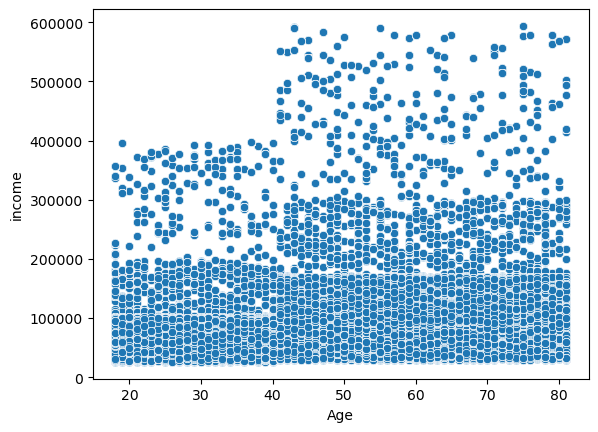

In [42]:
# Create visualization of age and income
scatter= sns.scatterplot(x = 'Age', y = 'income',data = norm_act_d)

In [43]:
# Aggregate max, mean, and min on profiles for frequency and spending
norm_act_d.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'time_of_order', 'days_since_prior_order', 'department_id',
       'price_range_loc', 'busiest_day', 'busiest_days', 'most_orders',
       'max_order', 'loyalty_flag', 'avg_price', 'spending_flag', 'order_freq',
       'frequency_flag', 'Gender', 'State', 'Age', 'n_dependants',
       'fam_status', 'income', 'Region', 'activity_flag', 'age_group',
       'income_group', 'department', 'fam_size'],
      dtype='object')

In [45]:
# Aggregate max, mean, and min on profiles for frequency and spending
norm_act_d.groupby('age_group').agg({'order_number': ['mean','max','min'], 'avg_price': ['mean','max','min']})

order_number          avg_price                        
                  mean max min       mean           max       min
age_group                                                        
Middle       17.869559  99   1  11.979510  15006.940000  1.000000
Older        17.807616  99   1  11.724449  14042.512281  1.262500
Younger      17.815972  99   1  12.133971  10209.987755  1.628571

In [46]:
norm_act_d.groupby('income_group').agg({'order_number': ['mean','max','min'], 'avg_price': ['mean','max','min']})

order_number          avg_price                   
                     mean max min       mean           max  min
income_group                                                   
High income     17.940294  99   1  21.980538  15006.940000  7.0
Lower income    17.477045  99   1   7.310041     22.256974  1.0
Mid income      18.092588  99   1   8.705371   3453.431034  7.0
Upper income    17.826665  99   1   9.737767   5135.893590  7.0

In [47]:
norm_act_d.groupby('fam_size').agg({'order_number': ['mean','max','min'], 'avg_price': ['mean','max','min']})

order_number          avg_price                      
                      mean max min       mean           max     min
fam_size                                                           
Large            17.837412  99   1  11.791609  10209.987755  1.2625
No dependants    17.957922  99   1  12.102657  15006.940000  1.0000
Small            17.770497  99   1  11.920187   6983.593023  1.0000

In [52]:
# Compare customer profiles with regions and departments
age_region= pd.crosstab(norm_act_d['age_group'], norm_act_d['Region'].sort_values(), dropna = False)

In [53]:
age_region

Region,Midwest,Northeast,South,West
age_group,,,,
Middle,2894197,2112381,4021260,3119927
Older,2455443,1884229,3521421,2713411
Younger,1911873,1468075,2768458,2093889


In [13]:
age_dep= pd.crosstab(norm_act_d['department'], norm_act_d['age_group'].sort_values(), dropna = False)

In [14]:
age_dep

age_group,Middle,Older,Younger
department,,,
alcohol,56814,47596,40217
babies,164354,138738,107300
bakery,439661,382446,298721
beverages,1011215,883669,677017
breakfast,262776,227751,180323
bulk,13006,11424,9021
canned goods,396842,344447,270785
dairy eggs,2028369,1762512,1386301
deli,394029,343335,266470


In [54]:
inc_region= pd.crosstab(norm_act_d['income_group'], norm_act_d['Region'].sort_values(), dropna = False)

In [55]:
inc_region

Region,Midwest,Northeast,South,West
income_group,,,,
High income,1841900,1372838,2549267,1977256
Lower income,1790670,1367074,2593220,1990041
Mid income,1777672,1355693,2639115,1967652
Upper income,1851271,1369080,2529537,1992278


In [58]:
inc_dep= pd.crosstab(norm_act_d['age_group'], norm_act_d['department'].sort_values(), dropna = False)

In [59]:
inc_dep

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
Middle,56814,164354,439661,1011215,262776,13006,396842,2028369,394029,322291,...,274850,100442,262971,25228,13365,698279,168404,36165,3562053,1085447
Older,47596,138738,382446,883669,227751,11424,344447,1762512,343335,280102,...,240635,86448,232752,21787,11604,609961,143728,31755,3104118,940733
Younger,40217,107300,298721,677017,180323,9021,270785,1386301,266470,219743,...,184372,69101,179058,17753,9442,474465,112174,25140,2413102,740226


In [60]:
fam_region= pd.crosstab(norm_act_d['fam_size'], norm_act_d['Region'].sort_values(), dropna = False)

In [61]:
fam_region

Region,Midwest,Northeast,South,West
fam_size,,,,
Large,1787286,1381233,2585864,2018133
No dependants,1822816,1354482,2581933,1980450
Small,3651411,2728970,5143342,3928644


In [62]:
fam_dep= pd.crosstab(norm_act_d['fam_size'], norm_act_d['department'].sort_values(), dropna = False)

In [63]:
fam_dep

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
fam_size,,,,,,,,,,,,,,,,,,,,,
Large,37333,102585,279822,640927,167322,8403,255325,1296264,252592,208412,...,176284,63473,171423,16435,8377,446156,106315,23142,2287719,691799
No dependants,36827,103328,281395,645341,166432,8000,251020,1294376,253382,204296,...,171358,64461,165878,15935,8714,443904,106205,23602,2275441,690438
Small,70467,204479,559611,1285633,337096,17048,505729,2586542,497860,409428,...,352215,128057,337480,32398,17320,892645,211786,46316,4516113,1384169


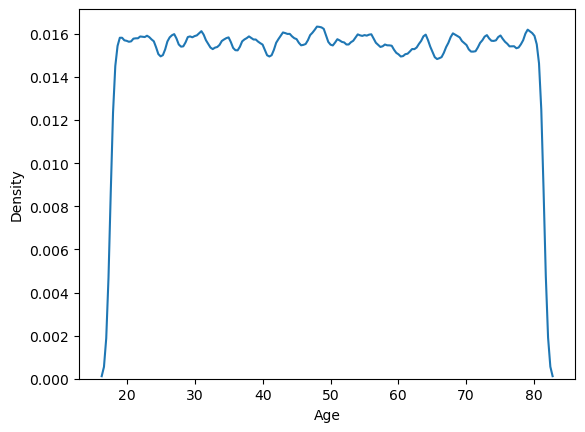

In [64]:
# Create relevant charts
age_dens=sns.kdeplot(norm_act_d['Age'])

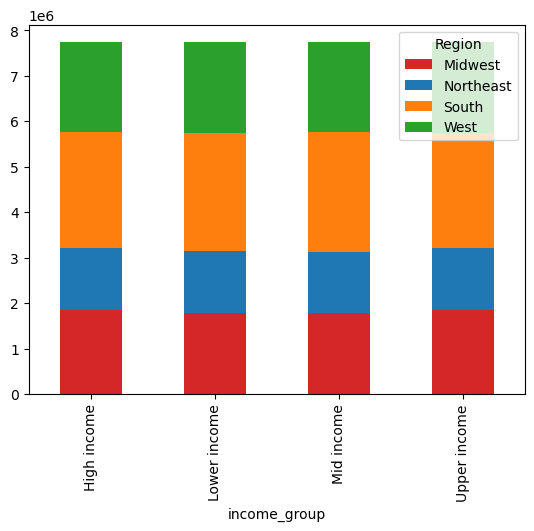

In [67]:
reg_bar=inc_region.plot(kind='bar', stacked=True, color= ['tab:red', 'tab:blue', 'tab:orange', 'tab:green'])

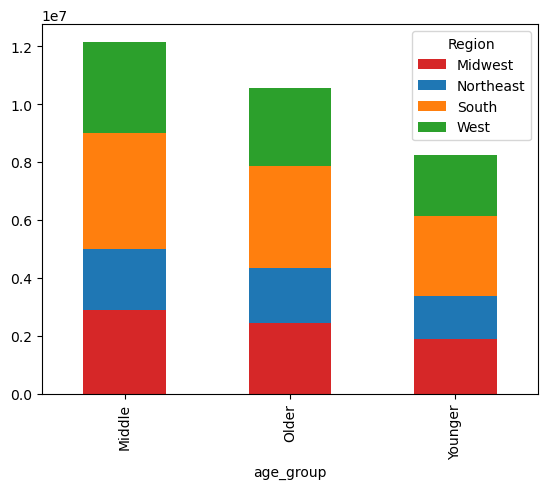

In [68]:
age_bar=age_region.plot(kind='bar', stacked=True, color= ['tab:red', 'tab:blue', 'tab:orange', 'tab:green'])

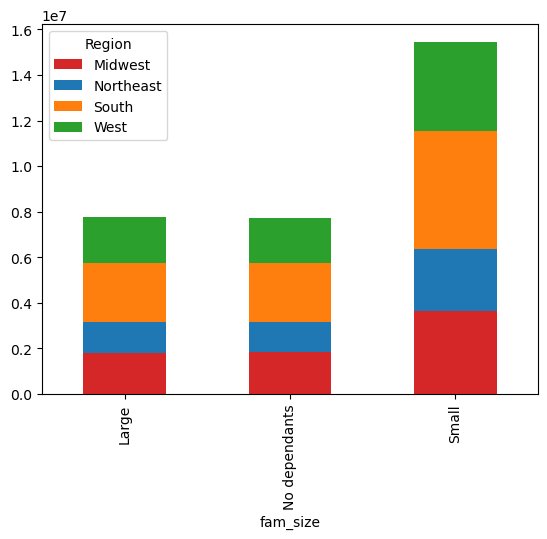

In [70]:
fam_bar=fam_region.plot(kind='bar', stacked=True, color= ['tab:red', 'tab:blue', 'tab:orange', 'tab:green'])

In [71]:
# Export
norm_act_d.to_pickle(os.path.join(path, 'normal_activity_departments.pkl'))

In [72]:
scatter.figure.savefig(os.path.join(path, 'age_vs_income.png'))

In [73]:
age_dens.figure.savefig(os.path.join(path, 'age_density.png'))

In [74]:
reg_bar.figure.savefig(os.path.join(path, 'income_v_region.png'))

In [75]:
age_bar.figure.savefig(os.path.join(path, 'age_v_region.png'))

In [76]:
fam_bar.figure.savefig(os.path.join(path, 'fam_size_v_region.png'))

In [77]:
norm_act_d.shape

(30964564, 29)

In [78]:
norm_act.shape

(30964564, 27)

In [7]:
dep_region= pd.crosstab(norm_act_d['department'], norm_act_d['Region'].sort_values(), dropna = False)

In [8]:
dep_region

Region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


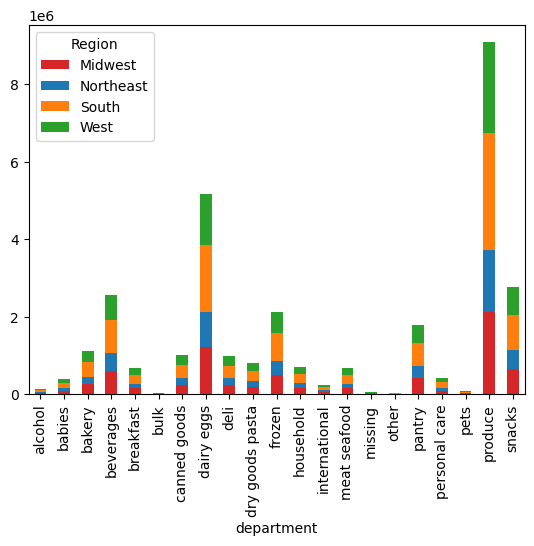

In [9]:
dep_bar=dep_region.plot(kind='bar', stacked=True, color= ['tab:red', 'tab:blue', 'tab:orange', 'tab:green'])

In [10]:
dep_bar.figure.savefig(os.path.join(path, 'department_region.png'))

In [14]:
size_spend= pd.crosstab(norm_act_d['spending_flag'], norm_act_d['n_dependants'].sort_values(), dropna = False)

In [15]:
size_spend

n_dependants,0,1,2,3
spending_flag,,,,
High spender,146042,143658,161059,152666
Low spender,7593639,7575448,7572202,7619850


In [18]:
age_spend=pd.crosstab(norm_act_d['spending_flag'], norm_act_d['Age'].sort_values(), dropna = False)

KeyError: 'age_group'

In [17]:
age_spend

Age,18,19,20,21,22,23,24,25,26,27,...,72,73,74,75,76,77,78,79,80,81
spending_flag,,,,,,,,,,,,,,,,,,,,,
High spender,9242,6606,9866,10121,8785,8076,13770,7536,9045,9319,...,8916,6824,5771,12698,9070,11106,12225,7534,10288,10439
Low spender,469215,489471,470328,478995,482026,484855,473838,441788,480847,491752,...,470968,492629,471397,486531,468278,466893,458894,500803,482462,475408


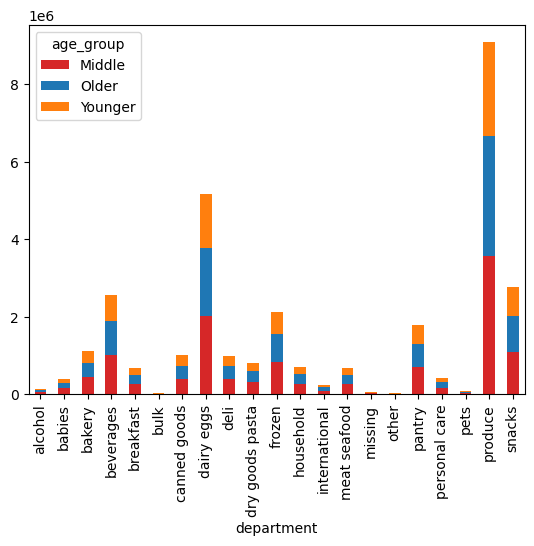

In [15]:
age_dep_bar=age_dep.plot(kind='bar', stacked=True, color= ['tab:red', 'tab:blue', 'tab:orange'])